In [1]:
import numpy as np
import matplotlib.pyplot as plt

from img_utils import ImgUtils
from noise_scheduler import NoiseScheduler

In [2]:
img = plt.imread("Images/n02109961-Eskimo_dog/n02109961_1351.jpg")
img = ImgUtils.int_to_float_img(img)
img = ImgUtils.resize_img(img, (256, 256))

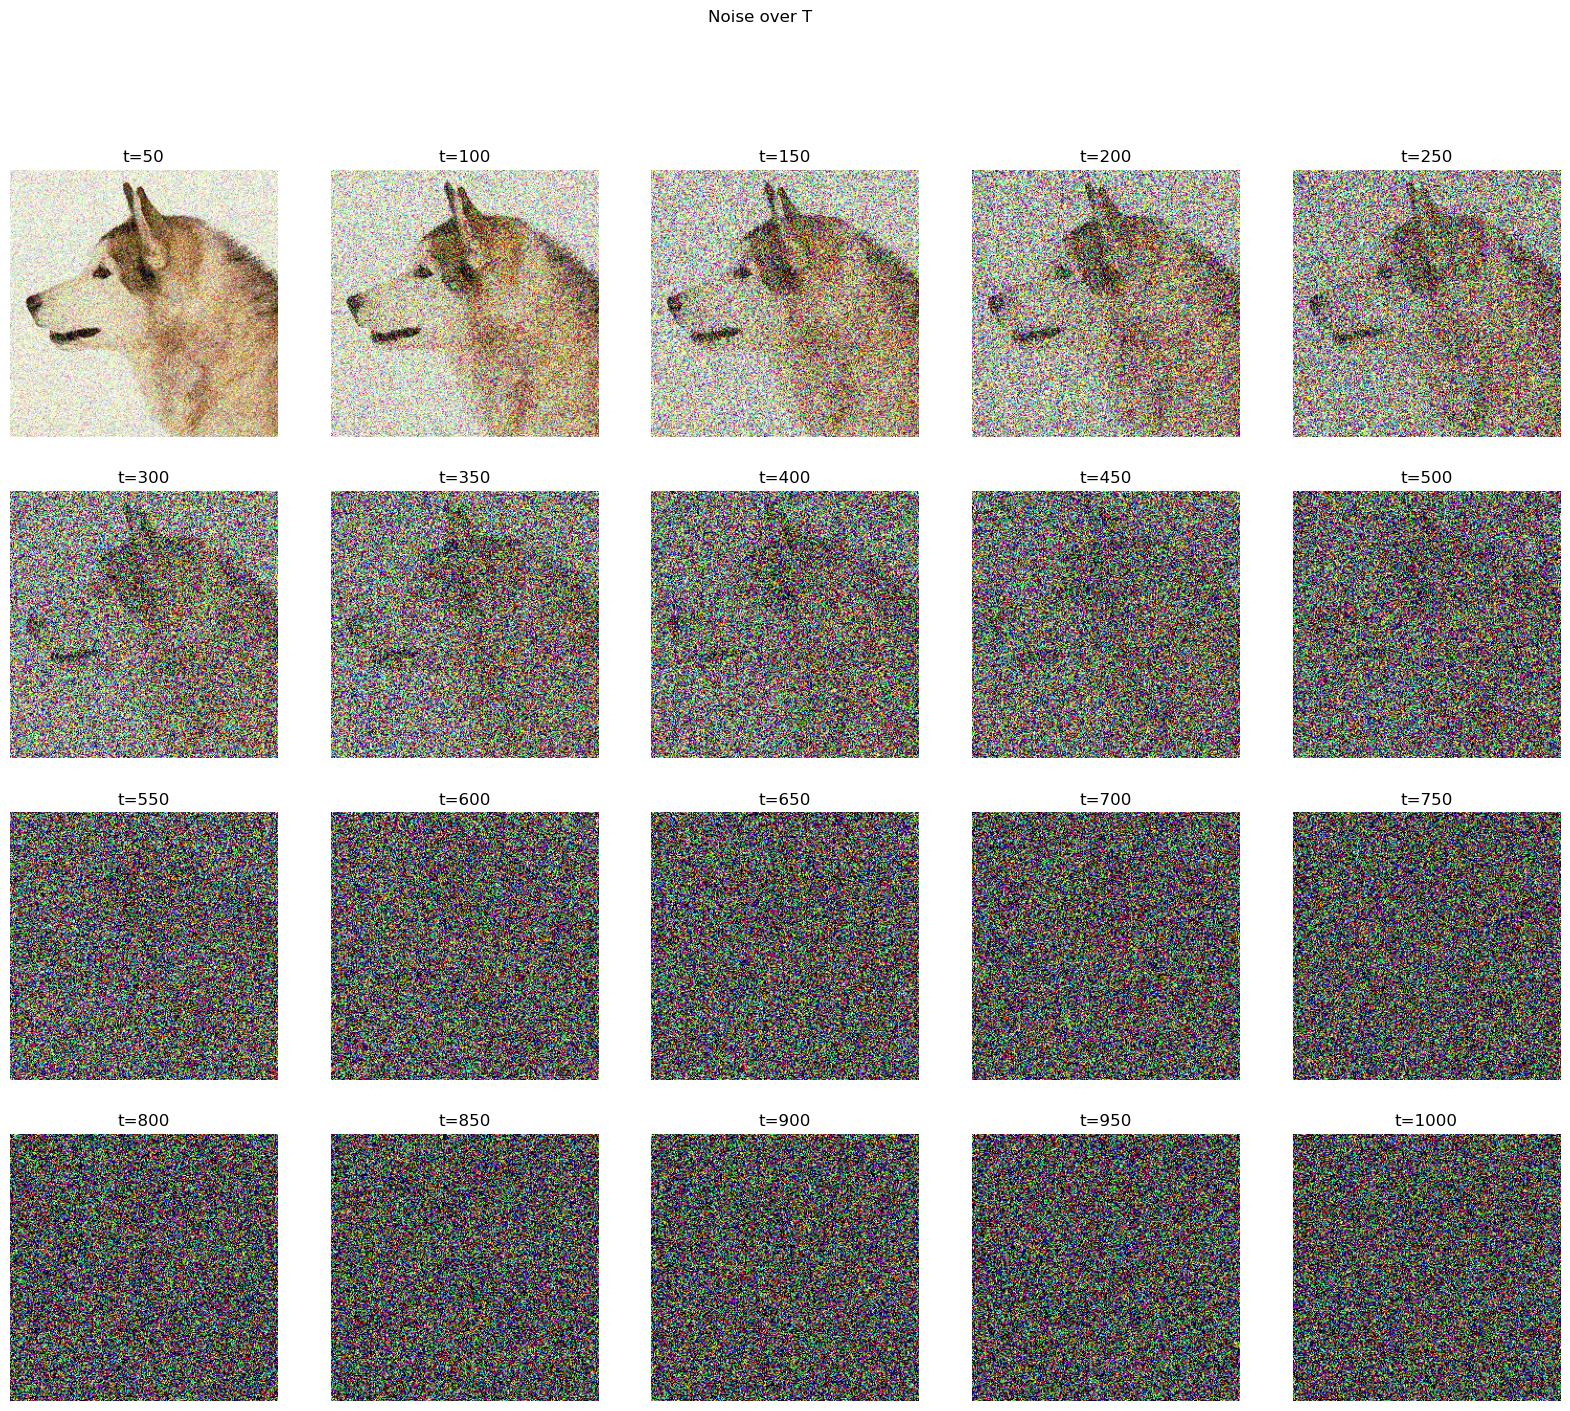

In [3]:
T = 1001
ns = NoiseScheduler(T)
ts = range(50, T+1, 50)

noised_images = [ns.forward(img, t).clip(0, 1) for t in ts]
subtitles = [f"t={t}" for t in ts]
ImgUtils.show_images(noised_images, cols=5, title="Noise over T", subtitles=subtitles)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


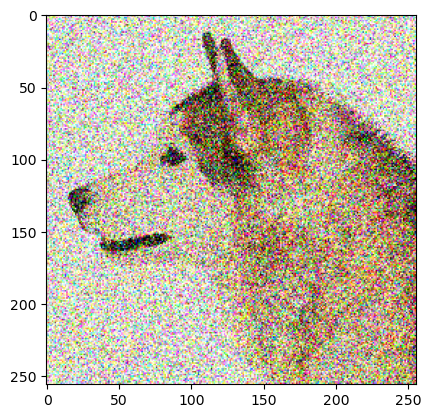

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


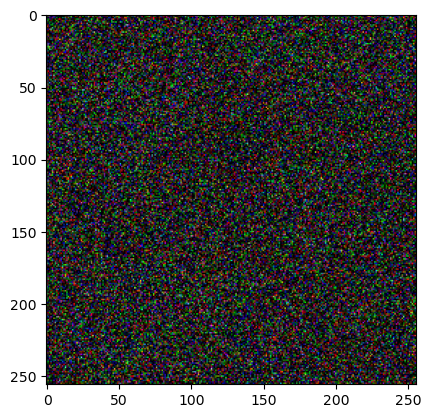

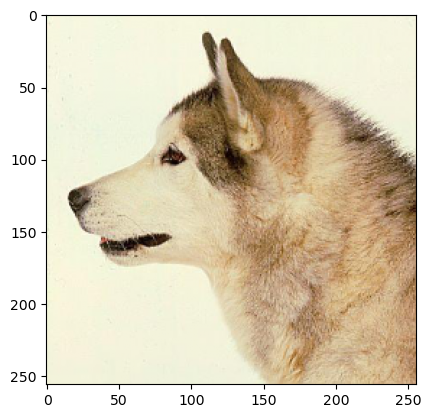

In [7]:
noised_img = ns.forward(img, 100)
plt.imshow(noised_img)
plt.show()
plt.imshow(img - noised_img)
plt.show()
plt.imshow(noised_img + (img - noised_img))

In [1]:
from unet import UNet

model = UNet.new()
model.compile(optimizer="adam", loss=lambda hx, y: (y-hx)**2)
model.summary()

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-10-29 12:44:38.619740: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-29 12:44:38.619851: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 16) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________